<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/section1_project_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 주제 : 다음 분기에 어떤 게임을 설계해야 할까요?  
2. 대상 : 비데이터 직군( 게임회사 투자가 관심있는 사람 )  
3. 목표 : 해당 주제에 대한 분석 설명 영상(5분) 발표를 통한 분석정보 전달   
4. 필수분석 내용   
  1) 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.  
  2) 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.  
  3) 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
url ="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"

df = pd.read_csv(url, index_col=0)
pd.set_option("max_rows", 10000)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
print(df.shape) # 데이터 shape확인
print(df.isnull().sum()) # 데이터 결측치 확인
print(df.dtypes) # 데이터타입확인 

(16598, 9)
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


In [4]:
# object 데이터 확인 
df.describe(include=["O"])

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598,16598,16548,16540,16598,16598,16598,16598
unique,11493,31,12,578,494,363,282,190
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts,0,0,0,0
freq,12,2163,3305,1351,4443,5665,10333,6386


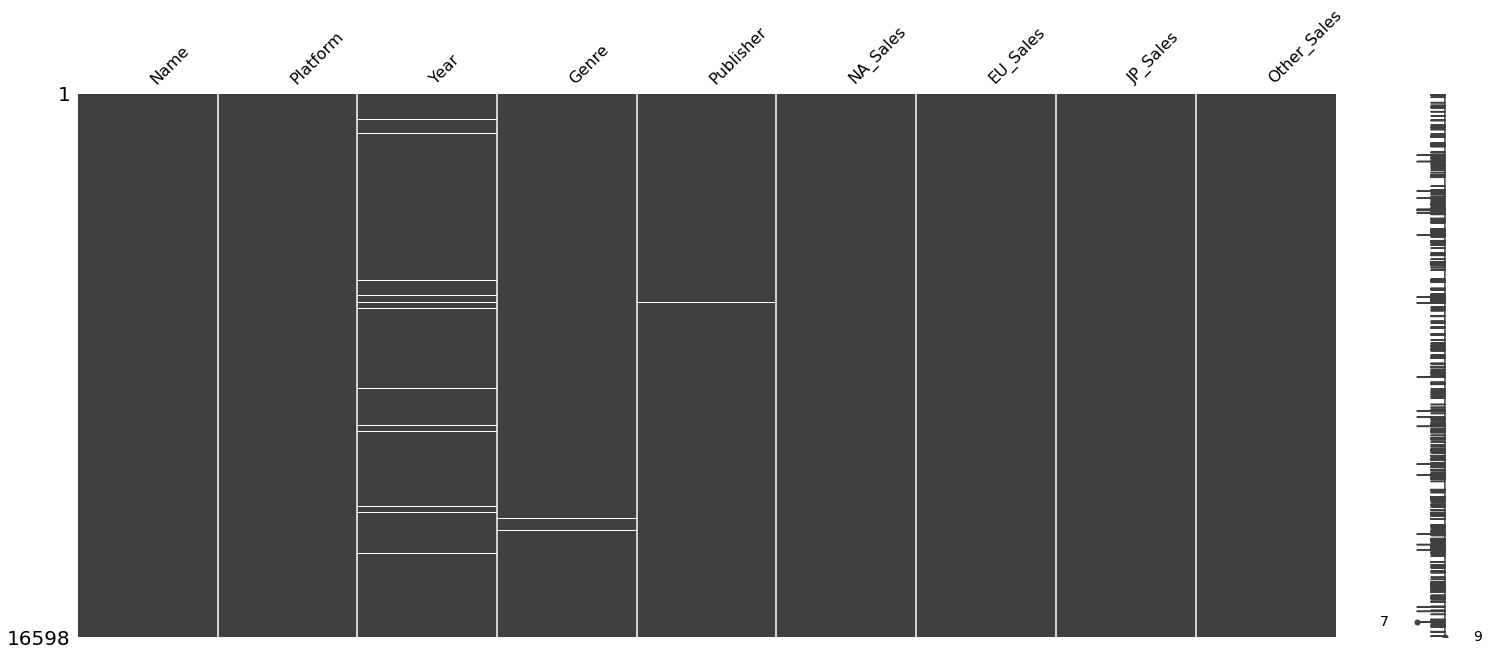

In [5]:
# 각 컬럼별 데이터 결측치 시각화
msno.matrix(df)

검정색으로 색칠된 부분이 데이터가 제대로 입력된 부분이며, 중간중간 가로로 줄이 그어진 부분이 데이터가 누락된 부분입니다.  
아래 그림과 비교하였을 때 저희 데이터는 결측치가 적은 양질의 데이터로 분석되었음을 안내드립니다.  

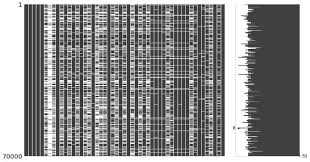

## 데이터 전처리 결과 보고 
#### 1. 총 데이터 row수 : 16598개 
#### 2. drop한 데이터 row수 : 457개
    2-1) 결측치 데이터 row 수 : 357개   
    *데이터 10%미만 데이터 드랍 근거(paper) : https://www.jstatsoft.org/article/view/v045i03/v45i03.pdf 
    2-2) 연도가 오기재된 데이터 row 수 : 100개
    *사유1 : 오래된 게임은 현재 트랜드를 반영하지 못함
    *사유2 : 추정하여 연도를 찾는다하여도 정확한 데이터인지 확인불가
    *사유3 : 오기재된 데이터 비율은 총 데이터의 5%미만에 해당되므로 drop함 
#### 결론 : drop한 데이터는 전체 데이터의 약 2.8%이며, 10% 미만이기에 drop함  



In [6]:
# 결측치 drop
df = df.dropna(axis=0)
df.shape

(16241, 9)

In [7]:
# 연도가 오기재된 데이터 drop
df = df[df["Year"] > 1900]
df.shape

(16141, 9)

In [8]:
lists = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
for list in lists :
  df[list] = (df[list].replace(r'[KM]+$', '', regex=True).astype(float) * df[list].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**-3, 10**1]).astype(int))


df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [9]:
df['Year'] = df['Year'].astype(str)

In [10]:
# 1) 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 2) 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3) 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [14]:
df["sum"] = df["NA_Sales"]+df["EU_Sales"]+df["JP_Sales"]+df["Other_Sales"]
df = df.sort_values(ascending=False, by="sum")
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
10914,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,96.30,5.31,0.06,1.38,103.05
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12601,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,70.30,1.98,0.08,0.78,73.14
578,Mario Kart 64,N64,1996.0,Racing,Nintendo,55.50,1.94,2.23,0.15,59.82
8534,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,31.20,0.59,42.72


In [34]:
df1 = df.iloc[0:10, :]
df1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum
10914,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,96.30,5.31,0.06,1.38,103.05
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12601,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,70.30,1.98,0.08,0.78,73.14
578,Mario Kart 64,N64,1996.0,Racing,Nintendo,55.50,1.94,2.23,0.15,59.82
8534,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,31.20,0.59,42.72


In [38]:
df1["Genre"].value_counts()

Role-Playing    2
Sports          2
Racing          2
Platform        2
Action          1
Shooter         1
Name: Genre, dtype: int64

TypeError: ignored

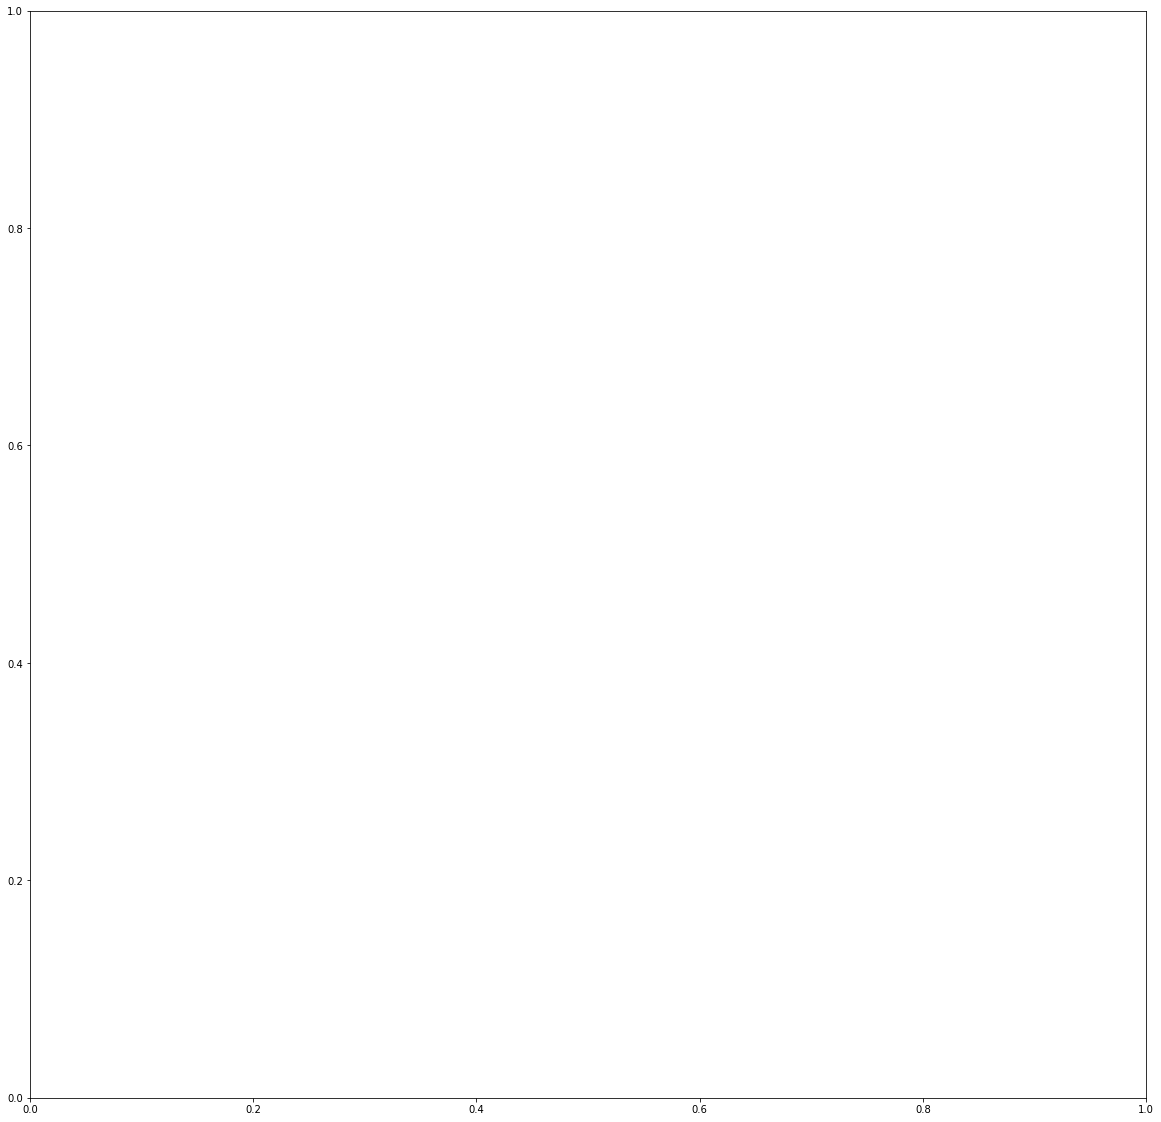

In [47]:
plt.figure(figsize=(20,20))
plt.barh( width=1.0, data=df1, x="Name", y="sum",palette="Blues_r").set_title("Sum")

In [ ]:
# df["Genre"] = df["Genre"].fillna(df.groupby(["Platform","Publisher"])["Genre"].transform("count"))
# df["Publisher"] = df["Publisher"].fillna(df.groupby(["Platform","Genre"])["Publisher"].transform("count"))
# df["Year"] = df["Year"].fillna(df.groupby(["Platform","Genre","Publisher"])["Year"].transform("count"))

# groupy와 fillna를 함께 사용할 수 있는데 잠깐 설명을 해놓자 나중에 내가 모르니까
# 일단 Genre라는 columns의 NaN값을 처리하려고 해 
# 그런데 "Platform","Publisher"를 그룹을 지어서 장르를 추측하고자 하는거야 
# 위 두 그룹의 count를 기준으로 비어있는 결측치 채우는 것이지 